In [20]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras import applications
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping


In [11]:
ds_train_ = image_dataset_from_directory(
    '/Users/erubaekedayen/base/env/Workspace/ML/img/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    '/Users/erubaekedayen/base/env/Workspace/ML/img/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)

def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
print(ds_train)

Found 1000 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


In [16]:
base = applications.InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(128,128,3))
base.trainable = False

model = keras.Sequential([
    base,
    layers.Flatten(),
    layers.Dense(6, activation="relu"),
    layers.Dense(1, activation="sigmoid")
]
)

optimizer = tf.keras.optimizers.Adam(epsilon=0.01)

model.compile(
    optimizer=optimizer,
    loss = "binary_crossentropy",
    metrics=["binary_accuracy"],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
)


Epoch 1/30


2023-04-11 14:21:09.553011: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


16/16 [==============================] - 8s 415ms/step - loss: 0.3644 - binary_accuracy: 0.8600 - val_loss: 0.0572 - val_binary_accuracy: 0.9950
Epoch 2/30
16/16 [==============================] - 6s 365ms/step - loss: 0.0456 - binary_accuracy: 0.9890 - val_loss: 0.0188 - val_binary_accuracy: 0.9950
Epoch 3/30
16/16 [==============================] - 6s 369ms/step - loss: 0.0199 - binary_accuracy: 0.9940 - val_loss: 0.0113 - val_binary_accuracy: 1.0000
Epoch 4/30
16/16 [==============================] - 6s 385ms/step - loss: 0.0124 - binary_accuracy: 0.9980 - val_loss: 0.0094 - val_binary_accuracy: 1.0000
Epoch 5/30
16/16 [==============================] - 6s 392ms/step - loss: 0.0100 - binary_accuracy: 0.9990 - val_loss: 0.0079 - val_binary_accuracy: 1.0000
Epoch 6/30
16/16 [==============================] - 7s 419ms/step - loss: 0.0082 - binary_accuracy: 0.9990 - val_loss: 0.0065 - val_binary_accuracy: 1.0000
Epoch 7/30
16/16 [==============================] - 7s 446ms/step - loss: 0

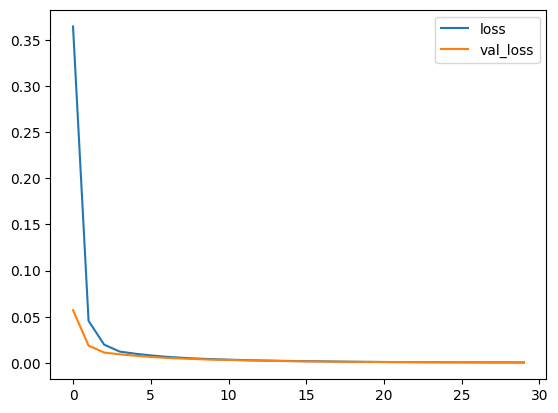

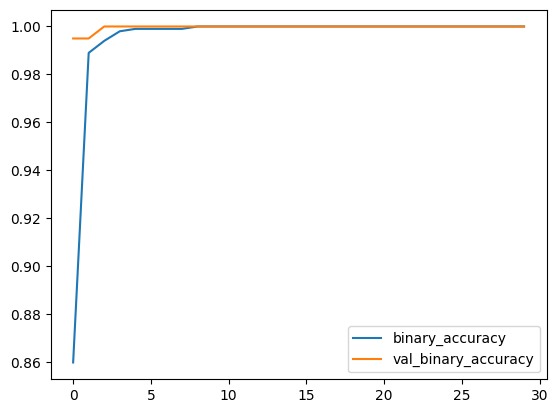

In [19]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [26]:
val_predictions = model.predict(ds_valid)


4/4 [==============================] - 1s 249ms/step
